Final output: [[0.50080832]]
Final input-to-hidden weights:
[[0.09949266 0.3565056 ]
 [0.79869542 0.48815726]]
Final hidden-to-output weights:
[[-0.30033485]
 [ 0.32546483]]
Iterations: 100


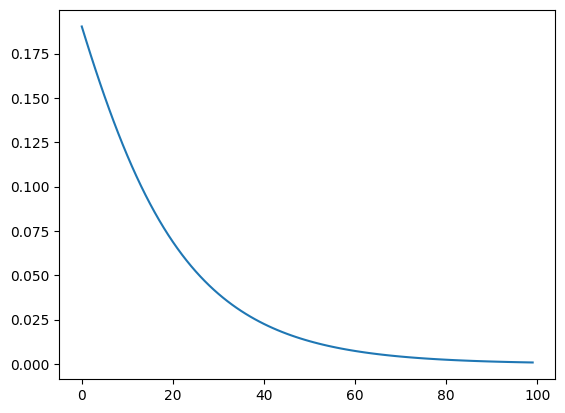

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

x = np.array([[0.35, 0.9]])
target_output = np.array([[0.5]])

input_to_hidden_weights = np.array([[0.1, 0.4], [0.8, 0.6]])
hidden_to_output_weights = np.array([[0.3], [0.9]]) 
err =[]
learning_rate = 1
error_threshold = 0
itr = 0
epoch = 0
while True:
    # Forward pass
    itr += 1
    hidden_input = np.dot(x, input_to_hidden_weights)
    hidden_output = sigmoid(hidden_input)
    
    final_input = np.dot(hidden_output, hidden_to_output_weights)
    final_output = sigmoid(final_input)
    
    output_error = target_output - final_output
    loss = np.mean(np.abs(output_error))
    err.append(loss)
    if loss < error_threshold:
        break

    if itr ==100: break

    output_delta = output_error * sigmoid_derivative(final_output)
    
    # Backpropagation to hidden layer
    hidden_error = output_delta.dot(hidden_to_output_weights.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)
    
    # Update weights
    hidden_to_output_weights += hidden_output.T.dot(output_delta) * learning_rate
    input_to_hidden_weights += x.T.dot(hidden_delta) * learning_rate

# Final output and weights
print("Final output:", final_output)
print("Final input-to-hidden weights:")
print(input_to_hidden_weights)
print("Final hidden-to-output weights:")
print(hidden_to_output_weights)
print("Iterations:", itr)
plt.figure()
plt.plot(err)
plt.show()
